In [1]:
import gmsh_worker as gw

geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

In [2]:
worker.construct_base_geo('./geo_core.txt', 0.4, 3, 1)

In [3]:
worker.run_geo()

Error   : Unknown number option 'Mesh.ElementType'


In [4]:
worker.read_refinement_chain()

In [5]:
worker.decrypt_chain()

In [6]:
print(worker.get_msh_files())

['0_refined.msh', '1_refined.msh', '2_refined.msh']


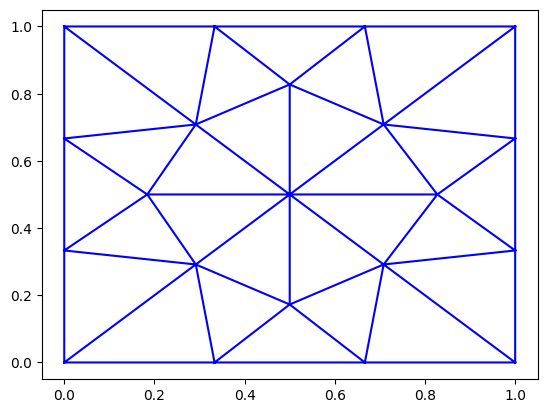

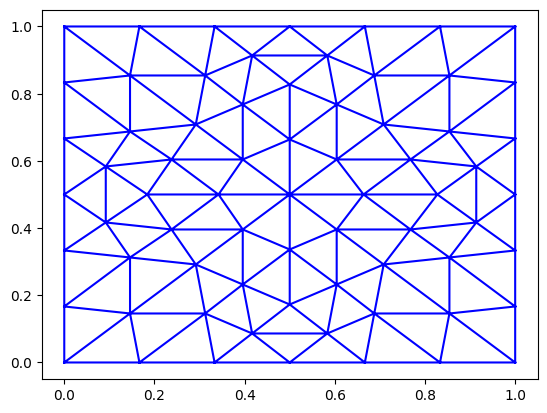

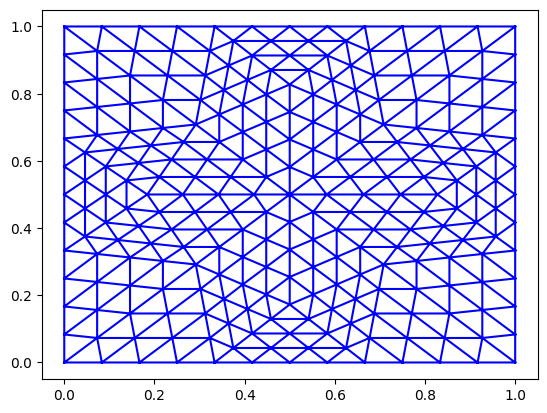

In [7]:
worker.plot_chain()

In [8]:
worker.convert_to_Triangle()

for mesh in worker.chain:
    print(mesh.keys())

dict_keys(['vertices', 'vertex_markers', 'triangles', 'edges', 'edge_markers'])
dict_keys(['vertices', 'vertex_markers', 'triangles', 'edges', 'edge_markers'])
dict_keys(['vertices', 'vertex_markers', 'triangles', 'edges', 'edge_markers'])


In [9]:
worker.remove_all_msh()

In [10]:
import triangle as tr
import matplotlib.pyplot as plt

In [14]:
coarse_mesh = worker.chain[0]
fine_mesh = worker.chain[-1]
# tr.compare(plt, coarse_mesh, fine_mesh)


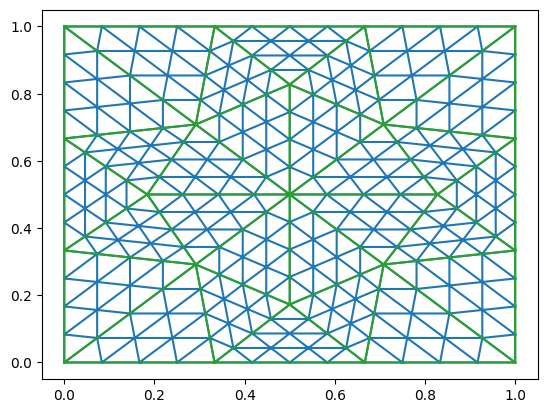

In [15]:
plt.triplot(fine_mesh['vertices'][:,0],
            fine_mesh['vertices'][:,1],
            fine_mesh['triangles'])
plt.triplot(coarse_mesh['vertices'][:,0],
            coarse_mesh['vertices'][:,1],
            coarse_mesh['triangles'])

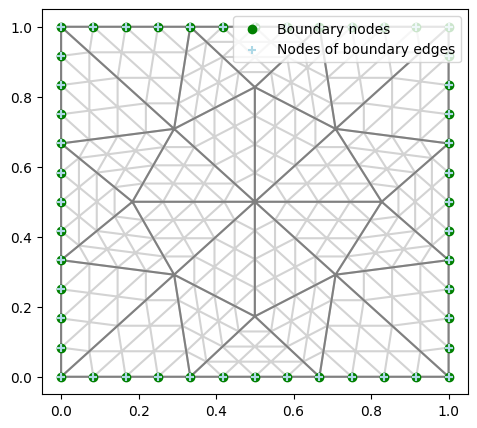

In [16]:
import numpy as np
filt = np.array(fine_mesh['vertex_markers']).astype(bool).flatten()
# print(filt)
nodes_on_boundary = np.array(fine_mesh['vertices'])[filt]

filt = np.array(fine_mesh['edge_markers']).astype(bool).flatten()
nodes_of_edges_on_boundary = fine_mesh['vertices'][fine_mesh['edges'][filt]]
nodes_of_edges_on_boundary = np.reshape(nodes_of_edges_on_boundary, (-1,2))

plt.figure(figsize=(5.5,5))
plt.scatter(nodes_on_boundary[:,0], nodes_on_boundary[:,1], color='green',label='Boundary nodes')
plt.scatter(nodes_of_edges_on_boundary[:,0], nodes_of_edges_on_boundary[:,1], color='lightblue',marker='+', label='Nodes of boundary edges')
plt.triplot(fine_mesh['vertices'][:,0], fine_mesh['vertices'][:,1], fine_mesh['triangles'], color='lightgrey', zorder=-1)
plt.triplot(coarse_mesh['vertices'][:,0], coarse_mesh['vertices'][:,1], coarse_mesh['triangles'], color='grey', zorder=-1)
plt.legend()